# 교차검층 및 하이퍼 파라미터 튜닝

### 타이타닉 생존자 예측 모델
- 머신러닝04 노트에서 수행한 예측 모델 계속해서 사용

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 타이타닉 생존자 예측 모델
- 사용 데이터 세트 : 타이타닉 탑승자 데이터 세트  
- 데이터 세트 분리 : 학습용 데이터 세트 80%, 테스트용(평가용) 데이터 세트 20%  
- 사용하는 ML 알고리즘  
    - 의사결정 트리 DecisionTreeClassifier
    - 랜덤 포레스트 : RandomForestClassifier
    - 로지스틱 회귀(분류): LogisticRegression  
- 모델 평가 : 예측 성능 평가 - 정확도   
- 교차 검증 : K-Fold 교차검증(cross-validation)  
- 하이퍼 파라미터 튜닝 : GridSearchCV 클래스 이용     

### (1) 데이터 준비 : 전처리

### 지금까지 가공한 내용을 정리하고 함수로 작성 (나중에 재사용 가능)

In [2]:
# 모든 전처리 작업을 함수로 만들어 놓음
# 결측치 처리
# 필요없는 열 제거
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

# 결측치 처리 함수
def fillna(df):
    df.fillna({'Age':titanic_df['Age'].mean(), 
               'Cabin':'N',
               'Embarked':'N'}, inplace=True)    
    return df

# 필요 없는 열 제거 함수 
# 머신러닝 알고리즘에 적용할 때 불필요한 열 제거하는 함수
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩수행 함수
def encode_features(df_data):
    df_data['Cabin'] = df_data['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    
    # 각 피처에 대해 반복 수행
    for f in features:
        encoder = LabelEncoder() 
        encoder = encoder.fit(df_data[f])
        df_data[f] = encoder.transform(df_data[f])
    
    return df_data

# 모든 함수들을 순서대로 한 번에 호출하기 위한 함수 
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    
    return df

### (2) 데이터 세트 준비 : 피처 데이터 세트 / 레이블 데이터 세트

In [3]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv('./data/titanic_train.csv')

# 레이블 데이터 세트  : 'Survived' 열
labels = titanic_df['Survived']

# 피처 데이터 세트 
# 'Survived' 열만 제외한 df 
feature_data = titanic_df.drop('Survived', axis=1)

# 데이터 전처리 함수 호출해서 전처리 수행 
feature_data = transform_features(feature_data)
feature_data.head(2)

# 생존자 예측을 수행할 피처 데이터 세트와 레이블 데이터 세트 완료

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0


### (3) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [4]:
# 학습/테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    labels,
                                                    test_size=0.2, 
                                                    random_state=11)

### (4) 모델 생성 및 학습 / 예측 / 평가
- 3개의 ML 알고리즘을 적용하여 모델 학습  
    - 결정 트리 : DecisionTreeClassifier  
    - 랜덤 포레스트 : RandomForestClassifier  
    - 로지스틱 회귀(분류): LogisticRegression  
- 생존자 예측   
- 예측 정확도 평가  
	- 예측된 결과값과 테스트 데이터의 실제 결과값과 비교해서 ML 모델 성능 평가  

In [5]:
# 3개의 알고리즘을 사용해서 학습/예측/평가 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=1000)
# max_iter=1000 : 알고리즘 학습을 반복 수행하는데
# 무한 반복되지 않도록 계산하여 해를 찾는 방법 횟수를 지정 

In [7]:
# 각 모델의 학습/예측/평가 

# (1) DecisionTreeClassifier 
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도 : {accuracy_score(y_test, y_pred_dt):.4f}')
# DecisionTreeClassifier 정확도 : 0.7877

# (2) RandomForestClassifier 
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(f'RandomForestClassifier 정확도 : {accuracy_score(y_test, y_pred_rf):.4f}')
# RandomForestClassifier 정확도 : 0.8547

# (3) LogisticRegression 
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도 : {accuracy_score(y_test, y_pred_lr):.4f}')
# LogisticRegression 정확도 : 0.8492

# 결과
# 3개의 머신러닝 알고리즘을 적용하여 모델 3개 생성해서
# 학습/평가/예측한 결과
# 랜덤 포레스트 알고리즘을 사용한 경우 예측 정확도가 가장 높게 나왔음 

DecisionTreeClassifier(random_state=11)

DecisionTreeClassifier 정확도 : 0.7877


RandomForestClassifier(random_state=11)

RandomForestClassifier 정확도 : 0.8547


LogisticRegression(max_iter=1000)

LogisticRegression 정확도 : 0.8492


In [8]:
#########################################################################

## 교차 검증 및 하이퍼 파라미터 튜닝 
- 정확도가 제일 낮은 결정 트리 모델에 교차 검증 수행하고 
- 하이퍼 파라미터 튜닝 수행

### (5) 교차 검증 수행
- 결정 트리 모델에 교차 검증 수행   
- 사이킷런 model_selection 패키지의  
- cross_val_score() 사용  

### 교차 검증
- 교차검증을 진행하는 모델의 최소 성능을 추정하기 위한 목적
- 교차검증을 한다고해서 성능이 좋아진다거나 하는 것은 아님
- 모델 평가의 신뢰성을 높이기 위해 수행 (모델을 일반화하기 위한 방법) (**성능 향상이 목적이 아님**)    
    - 데이터 세트를 학습/테스트용으로 분할하는 것보다  
    - 학습(학습/검증)/테스트용으로 분할하는 것이 더 신뢰성이 높다   
- 학습 데이터를 [학습 데이터 세트, 검증 데이터 세트]로 다시 분할하고  
    - 모델의 성능을 1차 평가  
- 테스트 데이터 세트  
    - 모든 학습/검증이 완료된 후 최종적으로 성능을 평가하기 위한 데이터 세트  
- K-Fold 교차검증(cross-validation) 가장 많이 사용   
    - k = 5인 경우 다섯 개의 폴드 세트에서  
        - 5번의 학습과 검증 평가 반복 수행  

---
- 일반 K-Fold 
- Stratified K-Fold
    - 학습 데이터와 검증 데이터 세트의 레이블 분포도가 유사하도록 
    - 검증 데이터를 추출하는 방식
    - 정확도가 더 높음  
    - 사이킷런의 cross_val_score()
    - 예 :전체 768개 중에서 1이 268개인 경우 : 34.89%
        - stratify=y 설정하는 경우  
            - 학습 데이터 세트에서 1의 비율 : 34.85% 
            - 테스트 데이터 세트에서 1의 비율 : 35.06%  
        - stratify=y 설정하지 않는 경우  
            - 학습 데이터 세트에서 1의 비율 : 34.36  
            - 테스트 데이터 세트에서 1의 비율 : 37.01%    

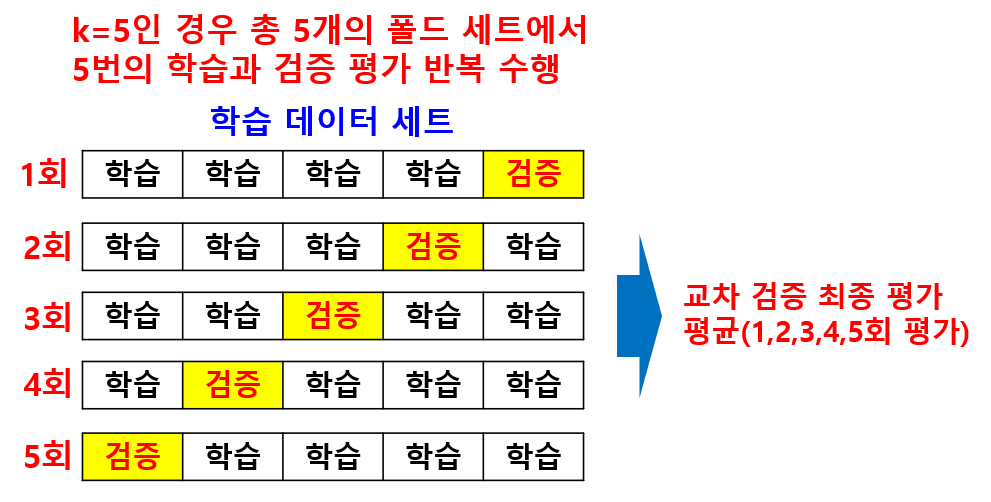

In [10]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`
     

In [13]:
# cross_val_score() 이용해서 교차 검증 수행
# cross_val_score(estimiter, 피처 데이터, 레이블 데이터, 폴드 수)
# estimater = dt_clf(모델)

from sklearn.model_selection import cross_val_score

# cross_val_score() 함수 호출하고 5회 교차 검증 결과 정확도 반환 
scores = cross_val_score(dt_clf, feature_data, labels, cv=5)
# scores # [0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663]

for count, accuracy in enumerate(scores):
    print(f'교차검증 {count+1} 정확도 : { accuracy:.4f}')

print(f'평균 정확도 : {np.mean(scores):.4f}')

# 결과
# dt_clf : 의사결정트리 알고리즘을 적용한 모델 
# 모델 평가 결과 정확도 : 0.7877 

# 교차검증 수행하지 않았을 때 정확도 : 0.7877
# 교차검증 수행 한 후 정확도 : 0.7879

# 교차검증은 성능 향상이 목적이 아닌 데이터 평가 신뢰성을 높이고자 수행 

교차검증 1 정확도 : 0.7430
교차검증 2 정확도 : 0.7753
교차검증 3 정확도 : 0.7921
교차검증 4 정확도 : 0.7865
교차검증 5 정확도 : 0.8427
평균 정확도 : 0.7879


In [14]:
# KFold 사용
# cross_val_score() 함수에서 cv=5로 교차검증 폴드 개수를 지정할 수는 있지만
# KFold의 파라미터를 지정할 수 없기 때문에
# KFold 객체를 만들어서 cv=kfold로 전달

# n_splits : 분할 세트 수, 1세트만 검증용(테스트) 데이터, 나머지는 학습용 데이터로 사용
# shuffle : True로 설정 시 데이터 세트 내의 순서를 섞어서 샘플링, False인 경우 순서대로 분할
# random_state  : shuffle이 True 인 경우에만 설정. False인 경우 설정하면 오류 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5, shuffle=True, random_state=42)
scores=cross_val_score(dt_clf, feature_data, labels, cv=kfold)

for count, accuracy in enumerate(scores):
    print(f'교차검증 {count+1} 정확도 : { accuracy:.4f}')

print(f'평균 정확도 : {np.mean(scores):.4f}')

# 평균 정확도 비교
# cv=5 :  0.7879
# KFold() : 0.8014


교차검증 1 정확도 : 0.7821
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.8202
교차검증 4 정확도 : 0.7978
교차검증 5 정확도 : 0.8202
평균 정확도 : 0.8014


### (6) 하이퍼 파라미터 튜닝

### GridSearchCV 클래스를 이용해 하이퍼 파라미터 튜닝
- 사이킷런 model_selection 패키지의 GridSearchCV 클래스 사용
- 머신러닝에서 모델의 성능 향상을 위해 쓰이는 기법 중 하나
- 시간이 오래걸린다는 단점

---
- GridSearchCV 클래스
    - fit() 메서드를 호출하면 grid search를 수행하여 
    - 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 
    - 최적 파라미터를 찾아줌
    - 결과 값을 갖는 속성들
        - best_score_ : 최고 정확도
        - best_params_ : 최적 하이퍼 파라미터
        - best_estimator_ : 최적 하이퍼 파라미터로 학습된 모형  

    - best_estimator_ 를 찾아서 테스트 데이터로 평가 수행하면
        - 이때 정확도가 바로 튜닝해서 얻어지는 성능이 향상된 정확도가 됨 

In [13]:
# 하이퍼 파라미터 튜닝을 하기 위해서는
# Decision Tree 파라미터를 알아야 함
# max_depth, min_samples_split, min_samples_lea

### DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정

- cv : 폴드 세트 지정 
- 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf  
- max_depth : 최대 트리 깊이. 값이 커질수록 과적합 쉽게 발생 
- min_samples_split: 분할하기 위한 최소 샘플 수
    - 중간 노드에서 분리가 일어나기  위한 샘플의 수  
    - 분할하기 위한 최소 샘플 수가 4라고 한다면  
    - 3개만 있는 경우에는 더 이상 분할하지  않음 (멈춤)  
- min_samples_leaf : leaf 노드가 될 수 있는 최소 샘플 개수  

- 하이퍼 파라미터 튜닝 목적  
    - 트리가 계속 분할해서 자식 노드를  만들면서 깊이가 깊어져   
    - 과적합이 발생하여 성능을 떨어트리는 일이 발생하지 않도록   
    - 파라미터 값들을 조정해서 튜닝을 수행 

- 하이퍼 파라미터 값을 변경하면서 성능 측정  
    - 최적 하이퍼 파라미터와 그때의 예측 값 출력하고   
    - 최적 하이퍼 파라미터로 학습된 estimator를 이용하여    
    - 분리된 테스트 데이터 세트에서 예측을 수행해서  
    - 예측 정확도 출력 - 최종 튜닝된 정확도  


In [18]:
# (1) DecisionTreeClassifier 알고리즘 사용
# dt_clf 모델에 적용

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정 : 각 값을 조합하여 수행  
parameters = {
    "max_depth":[2, 3],
    "min_samples_split":[2, 3, 5],
    "min_samples_leaf":[1, 5],
}

# GridSearchCV(모델, 파라미터, 평가방법, 폴드수)
grid_dclf = GridSearchCV(dt_clf, parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print(f'GridSearchCV 최적의 하이퍼 파라미터 : {grid_dclf.best_params_}')
print(f'GridSearchCV 최고 정확도 : {grid_dclf.best_score_:.6f}')

# dt_clf 모델에 적용
# GridSearchCV 최적의 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
# GridSearchCV 최고 정확도 : 0.799183

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

GridSearchCV 최적의 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.799183


In [19]:
# 최고 점수를 낸 파라미터를 가진 모형(모델)
best_dclf = grid_dclf.best_estimator_

# best_dclf(최적 하이퍼 파라미터로 학습된 Estimator(모델))로 예측/평가 수행 
y_pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : { accuracy:.4f}')

# dt_clf 모델에 적용
# 하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : 0.8715
# 하이퍼 파라미터 튜닝 전 정확도 : 0.7877

하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : 0.8715


In [24]:
# best estimator 확인 
grid_dclf.best_estimator_
# max_depth=3, min_samples_leaf=5, random_state=11 일 때의 estimator 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=11)

In [20]:
# 모든 경우의 수 조합
grid_dclf.cv_results_["params"]

[{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2},
 {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3},
 {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5},
 {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2},
 {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 3},
 {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5},
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3},
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5},
 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 3},
 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}]

In [21]:
grid_dclf.cv_results_["mean_test_score"]

array([0.75844578, 0.75844578, 0.75844578, 0.75844578, 0.75844578,
       0.75844578, 0.79917266, 0.79917266, 0.79917266, 0.79918251,
       0.79918251, 0.79918251])

In [25]:
# 결과를 df 만들어서 확인
result_df = pd.DataFrame(grid_dclf.cv_results_['params'])
result_df['mean_test_score'] = grid_dclf.cv_results_['mean_test_score']
result_df.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_leaf,min_samples_split,mean_test_score
11,3,5,5,0.799183
9,3,5,2,0.799183
10,3,5,3,0.799183
7,3,1,3,0.799173
6,3,1,2,0.799173
8,3,1,5,0.799173
1,2,1,3,0.758446
0,2,1,2,0.758446
3,2,5,2,0.758446
2,2,1,5,0.758446


In [28]:
# (2) RandomForestClassifier 알고리즘 사용
# rf_clf 모델에 적용 - 의사결정 트리 기준으로 구성된 알고리즘
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth":[6, 7, 8, 10],
    "min_samples_leaf":[9, 16],
    "min_samples_split":[8, 9, 12], 
}

# GridSearchCV(모델, 파라미터, 평가방법, 폴드수)
grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print(f'GridSearchCV 최적 하이퍼 파라미터 : {grid_dclf.best_params_}')
print(f'GridSearchCV 최고 정확도 : {grid_dclf.best_score_:.4f}')

# GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 8}
# GridSearchCV 최고 정확도 : 0.8062

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [6, 7, 8, 10],
                         'min_samples_leaf': [9, 16],
                         'min_samples_split': [8, 9, 12]},
             scoring='accuracy')

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 8}
GridSearchCV 최고 정확도 : 0.8062


In [29]:
# 최고 점수를 낸 파라미터를 가진 모형(모델)
best_dclf = grid_dclf.best_estimator_

# best_dclf로(최적 하이퍼 파라미터로 학습된 Estimator)로 예측/평가 수행
y_pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(f'하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : {accuracy:.4f}')

# 하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : 0.8827
# 하이퍼 파라미터 튜닝 전 정확도 : 0.8547
# 랜덤 포레스트 모델의 경우 약 3% 향상됨  

하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : 0.8827


In [ ]:
# (3) LogisticRegression 알고리즘 사용
# lr_clf 모델에 적용

In [31]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정 : 각 값을 조합하여 수행  

# 로지스틱 회귀인 경우 하이퍼 파라미터 다름
parameters3 = {
    "max_iter":[100, 300, 500, 1000], # 회귀계수가 무한정 증가하는 것을 방지
    "penalty":["l2","l1"], # 회귀의 규제방법
    "C":[0.01, 0.05, 0.1, 0.5, 1, 5] , # 규제 강도 : 보편적으로 이렇게 해보고 나중에 
}

# GridSearchCV(모델, 파라미터, 평가방법, 폴드수)
grid_dclf = GridSearchCV(lr_clf, param_grid=parameters3, scoring='accuracy', cv=5)

grid_dclf.fit(X_train, y_train)

print(f'GridSearchCV 최적 하이퍼 파라미터 : {grid_dclf.best_params_}')
print(f'GridSearchCV 최고 정확도 : {grid_dclf.best_score_:.4f}')

# GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
# GridSearchCV 최고 정확도 : 0.7809

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'max_iter': [100, 300, 500, 1000],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
GridSearchCV 최고 정확도 : 0.7809


In [ ]:
# 참고 
# penalty : 규제 (과적합을 방지하기 위한 수단)
# L1 : 회귀 계수 값의 제곱에 대해 패널티를 부여하는 방식
# L2 : 회귀 계수 값의 절대값에 대해 패널티를 부여하는 방식
# 'C' : 규제 강도 (값이 작을 수록 규제가 강해짐)

In [33]:
# 최고 점수를 낸 파라미터를 가진 모형(모델)
best_dclf = grid_dclf.best_estimator_

y_pred = grid_dclf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)


print(f'하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : {accuracy:.4f}')

# 하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : 0.8547
# 하이퍼 파라미터 튜닝 전 정확도 : 0.8492

하이퍼 파라미터 튜닝을 끝낸 최종 정확도 : 0.8547


### 타이타닉 모델의 성능 왜곡 문제
- 타이타닉 예제 수행 결과  정확도가 80%대(0.8715) 정도
  - 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 월등히 높았기 때문에
  - 별다른 알고리즘 적용하지 않고도
  - 무조건 성별이 여자인 경우 생존, 남자인 경우 사망으로 예측해도
    - 이와 비슷한 수치가 나올 수 있음
 - 알고리즘(모델) 성능이 좋지 않더라도 단지 성별 조건 하나만을 가지고
   - 높은 정확도를 나타내는 상황이 발생한 것
 - 불균형한 레이블 값 분포로 인해 정확도가 높게 나온 것임 (성능이 왜곡되었음)
 ---
 - 정확도 평가 지표의 맹점
   - 아무것도 하지 않고도 무조건 특정 결과로만 찍어도  
   - 데이터가 균일하지 않은 경우 높은 수치가 나타날 수 있음
   - 따라서 다른 성능평가지표도 같이 살펴 보아야 함  